In [1]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 4.3 MB/s eta 0:00:00


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf

In [3]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
df=pd.read_csv('gdrive/My Drive/Copy of rig_data_cleaned.csv')
display(df.head())
display(df.tail())

,Date Time,Hole Depth,Bit Position,Bit Status,Block Height,Hook Load,ROP - Average,Top Drive RPM,Top Drive Torque,Pump SPM - Total,Pump Pressure,Flow In Rate,Rig Activity,Rig Activity Code,Rig Activity Engine,Rig Activity SubCode,Bit Weight
0,2023-01-15 01:48:46,1.0,1.0,0.0,90.21,47.5,0.0,0.0,0.0,0.0,33.79,0.0,1.0,0.0,0.0,0.0,1.7
1,2023-01-15 01:48:47,1.0,1.0,0.0,90.21,47.4,0.0,0.0,0.0,0.0,32.66,0.0,1.0,0.0,0.0,0.0,1.8
2,2023-01-15 01:48:48,1.0,1.0,0.0,90.21,47.5,0.0,0.0,0.0,0.0,33.67,0.0,1.0,0.0,0.0,0.0,1.7
3,2023-01-15 01:48:49,1.0,1.0,0.0,90.21,47.5,0.0,0.0,0.0,0.0,34.37,0.0,1.0,0.0,0.0,0.0,1.7
4,2023-01-15 01:48:50,1.0,1.0,0.0,90.21,47.5,0.0,0.0,0.0,0.0,34.98,0.0,1.0,0.0,0.0,0.0,1.7


,Date Time,Hole Depth,Bit Position,Bit Status,Block Height,Hook Load,ROP - Average,Top Drive RPM,Top Drive Torque,Pump SPM - Total,Pump Pressure,Flow In Rate,Rig Activity,Rig Activity Code,Rig Activity Engine,Rig Activity SubCode,Bit Weight
2159122,2023-04-09 06:21:09,22872.0,22861.47,0.0,50.0,21.8,0.0,0.0,0.0,0.0,38.32,0.0,1.0,0.0,0.0,0.0,27.8
2159123,2023-04-09 06:21:10,22872.0,22861.47,0.0,50.0,21.8,0.0,0.0,0.0,0.0,37.12,0.0,1.0,0.0,0.0,0.0,27.8
2159124,2023-04-09 06:21:11,22872.0,22861.47,0.0,50.0,21.8,0.0,0.0,0.0,0.0,38.16,0.0,1.0,0.0,0.0,0.0,27.8
2159125,2023-04-09 06:21:12,22872.0,22861.47,0.0,50.0,21.8,0.0,0.0,0.0,0.0,39.89,0.0,1.0,0.0,0.0,0.0,27.8
2159126,2023-04-09 06:21:13,22872.0,22861.47,0.0,50.0,21.8,0.0,0.0,0.0,0.0,39.89,0.0,1.0,0.0,0.0,0.0,27.8


In [6]:
# Removing "Date Time" so that we can process the information in the following steps
df = df.drop(columns = "Date Time")

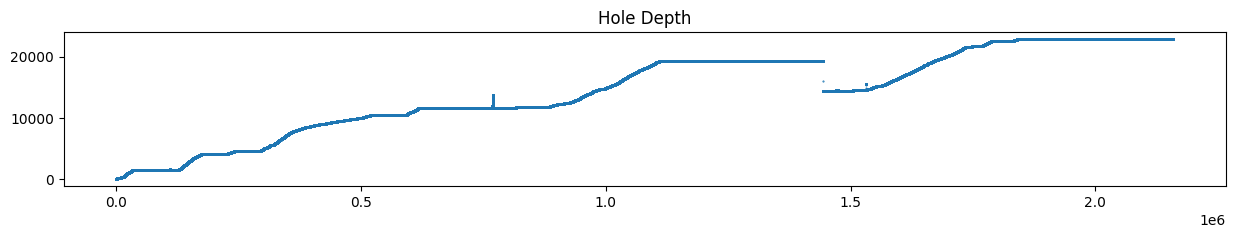

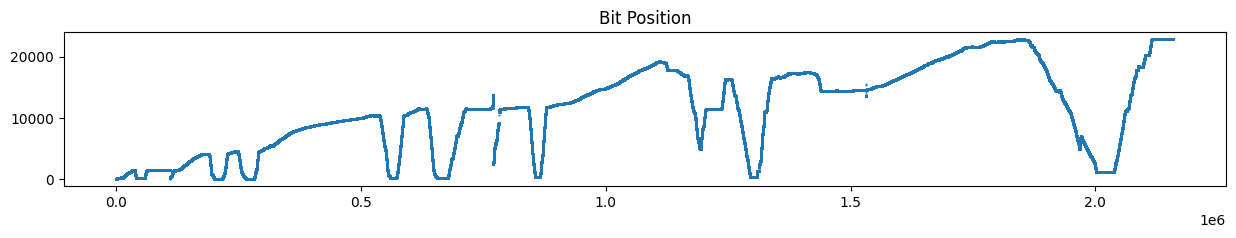

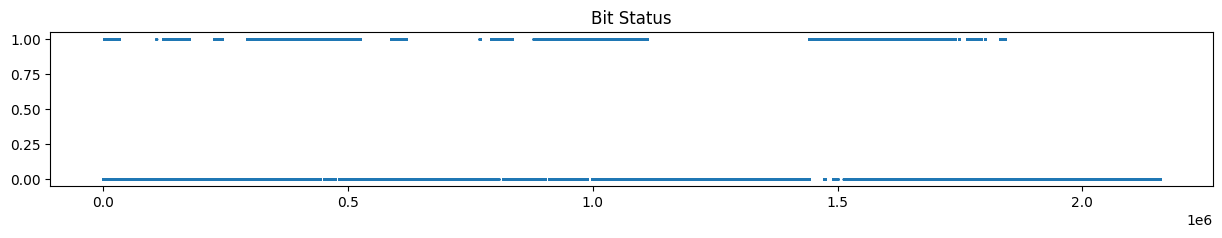

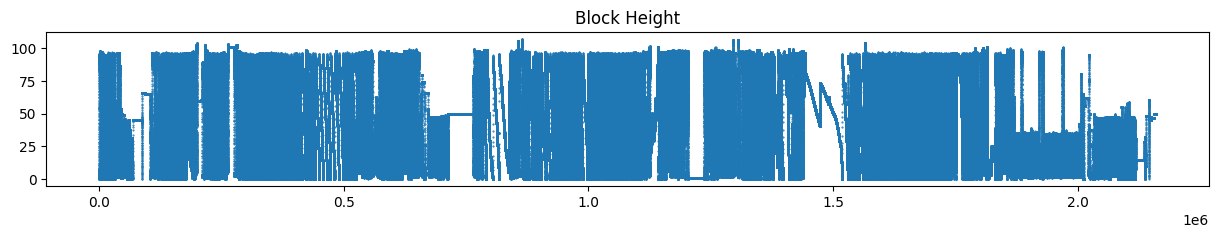

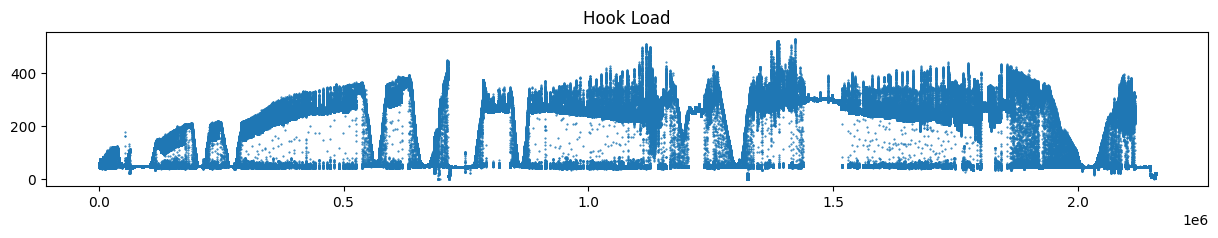

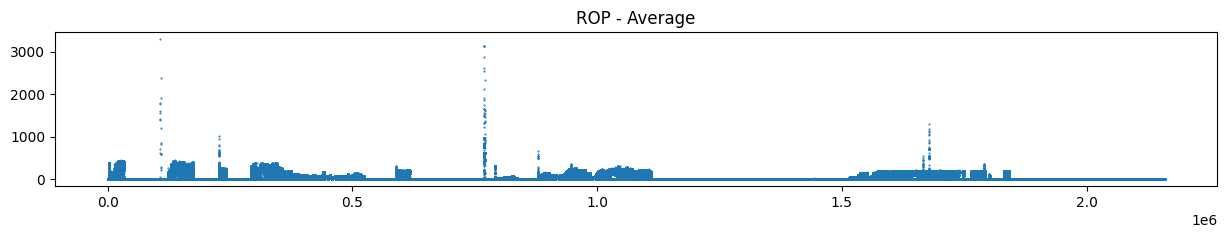

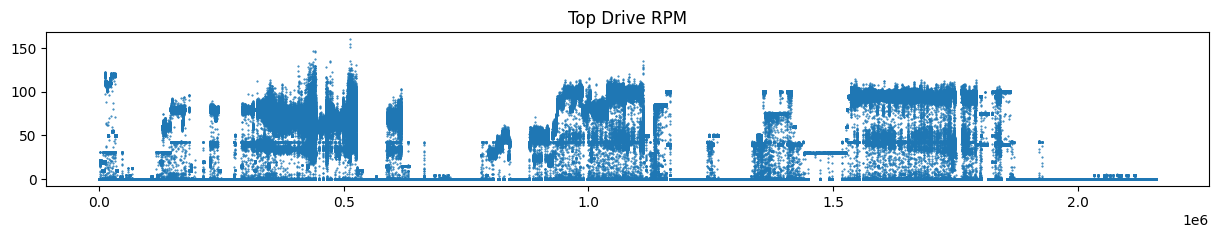

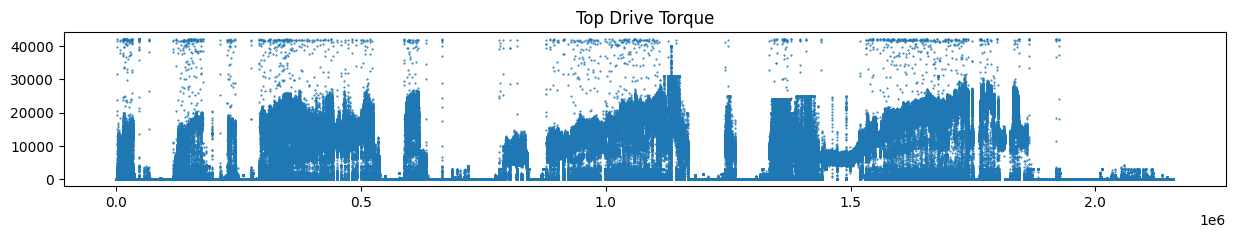

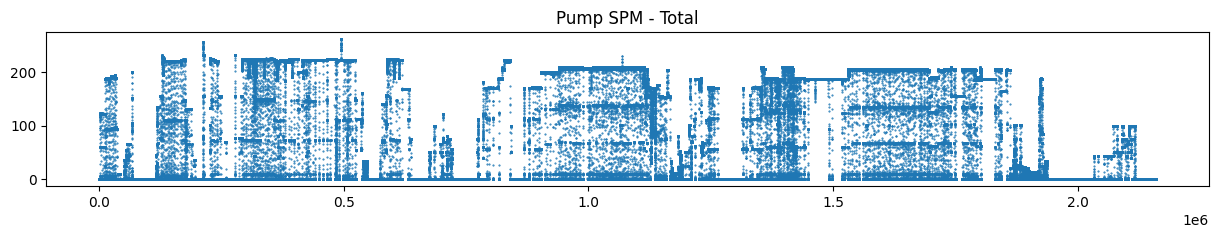

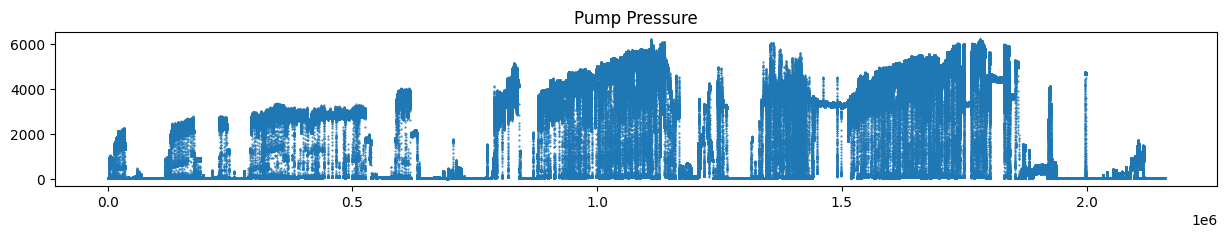

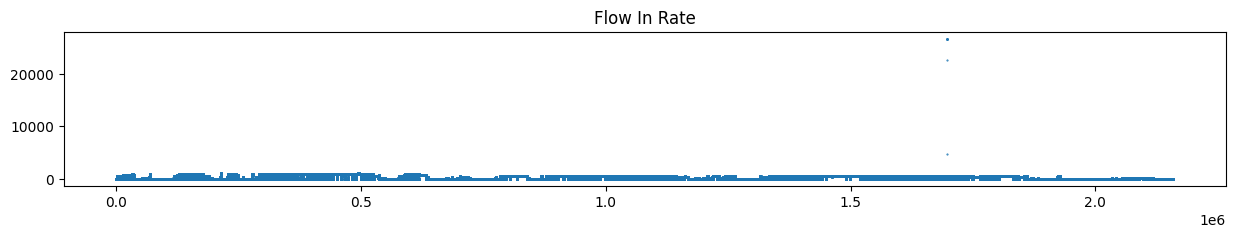

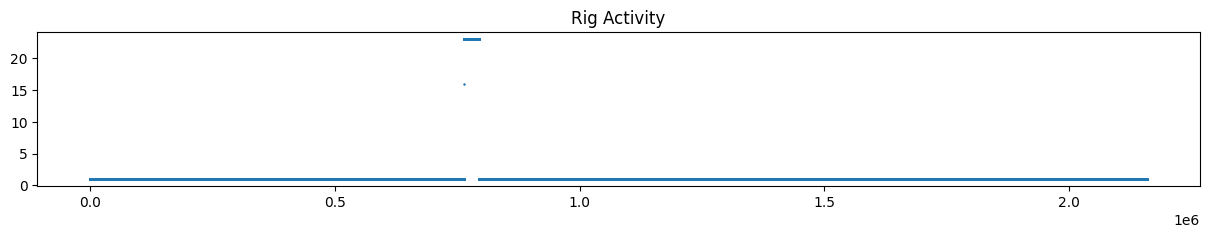

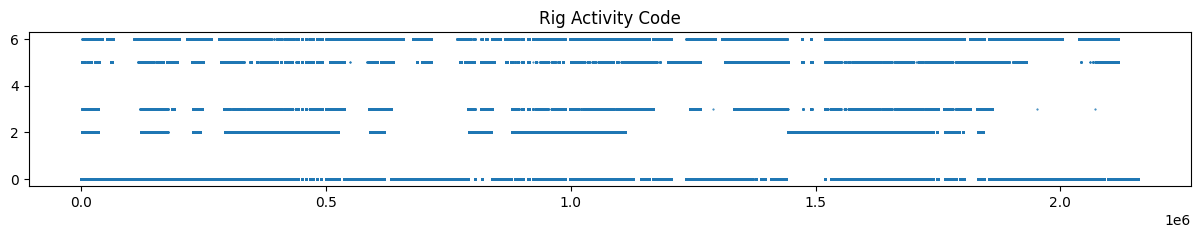

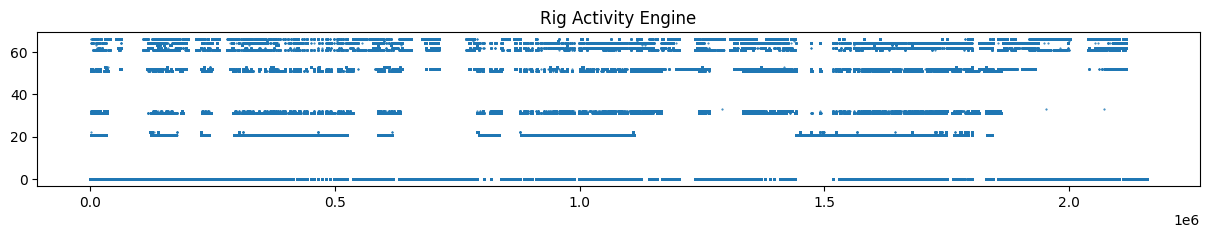

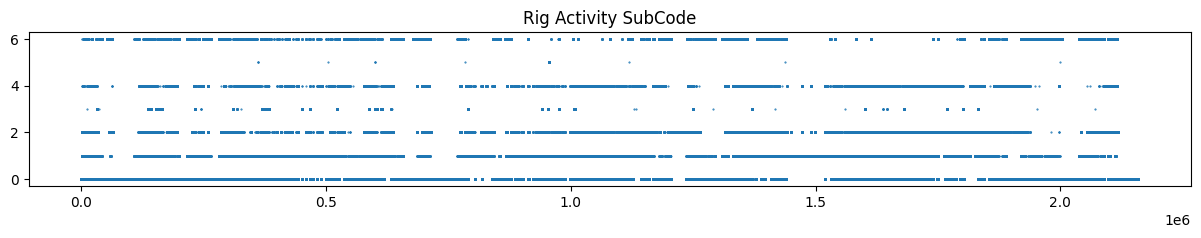

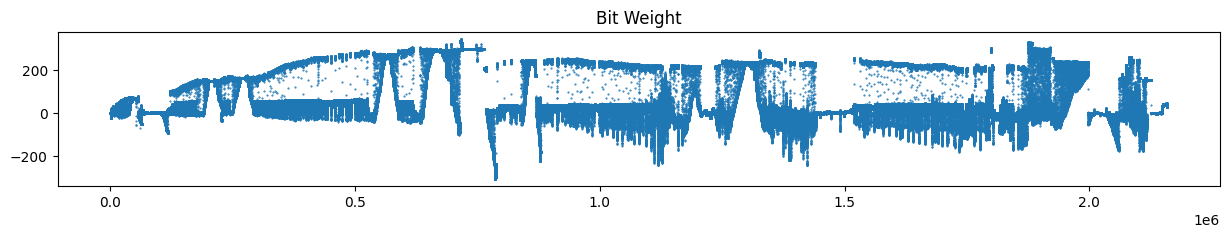

In [7]:
#Generate matplotlib graphs for hole depth, bit position, bit weight, Top Drive RPM, Top Drive Torque, and Rig Activity

#import dependencies
import matplotlib.pyplot as plt
import numpy as np

#hole depth
for column in df.columns:
  plt.figure(figsize=(15,2))
  plt.title(column)
  plt.plot(df[column], linestyle='', marker='.', markersize='1')
  plt.show()

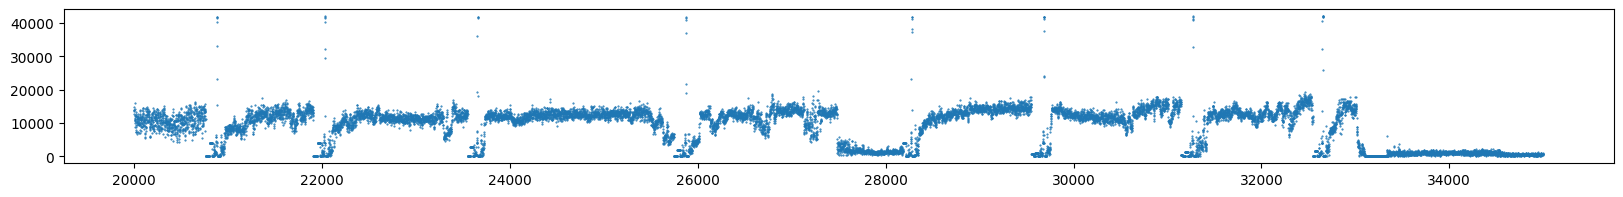

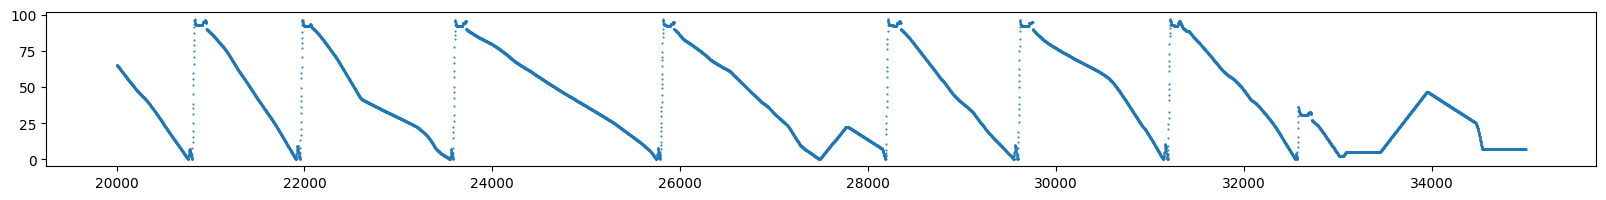

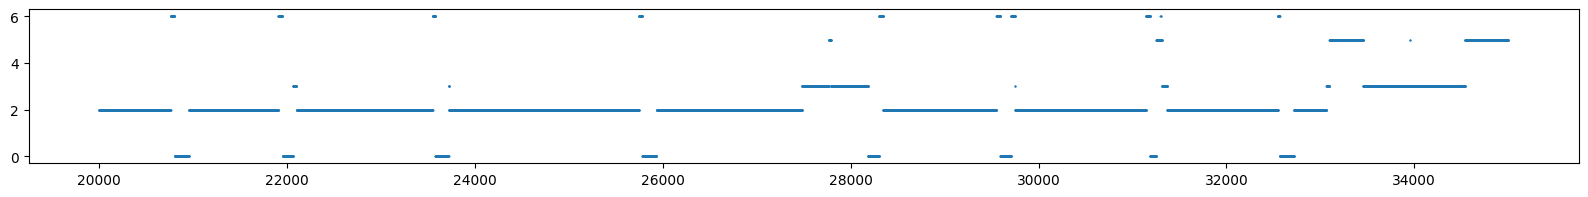

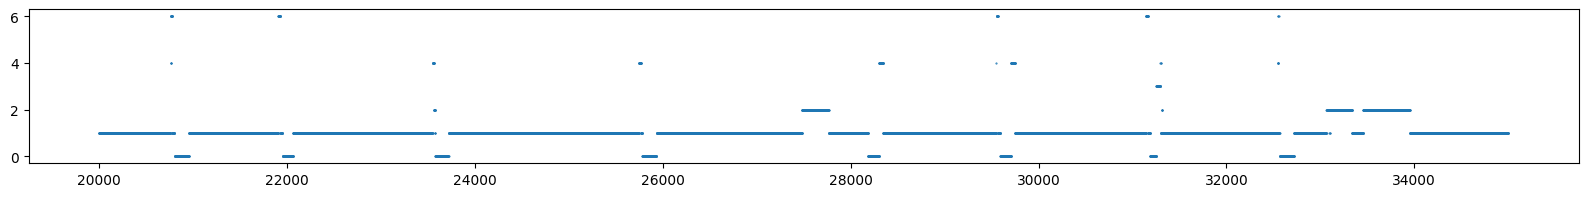

In [8]:
active_code = df['Top Drive Torque'].iloc[20000:35000]
active_code2 = df['Block Height'].iloc[20000:35000]
active_code3 = df['Rig Activity Code'].iloc[20000:35000]
active_code4 = df['Rig Activity SubCode'].iloc[20000:35000]
plt.figure(figsize=(20,2))
plt.plot(active_code, linestyle='', marker='.', markersize='1')

plt.show()
plt.figure(figsize=(20,2))
plt.plot(active_code2, linestyle='', marker='.', markersize='1')
plt.show()
plt.figure(figsize=(20,2))
plt.plot(active_code3, linestyle='', marker='.', markersize='1')
plt.show()
plt.figure(figsize=(20,2))
plt.plot(active_code4, linestyle='', marker='.', markersize='1')

In [9]:
# Remove Rig Activity Code target from features data
y = df["Rig Activity Code"].values
X = df.drop(columns=["Rig Activity Code"]).values

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [10]:
# Preprocess numerical data for neural network

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [11]:
# Define the deep learning model 
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=30,
        step=5), activation=activation, input_dim=15))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=30,
            step=5),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [12]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

In [ ]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 17 Complete [00h 33m 55s]
val_accuracy: 0.33969640731811523

Best val_accuracy So Far: 0.33969640731811523
Total elapsed time: 02h 51m 31s

Search: Running Trial #18

Value             |Best Value So Far |Hyperparameter
tanh              |tanh              |activation
6                 |11                |first_units
1                 |5                 |num_layers
16                |21                |units_0
6                 |1                 |units_1
1                 |1                 |units_2
26                |1                 |units_3
11                |1                 |units_4
20                |3                 |tuner/epochs
7                 |0                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
2                 |0                 |tuner/round
0013              |None              |tuner/trial_id

Epoch 8/20
50605/50605 [==============================] - 124s 2ms/step - loss: -2974.5781 - accuracy: 0.3397 - val_loss: -3566.675

In [ ]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

In [ ]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")